# Лабораторная работа №4. Регрессионный анализ данных

## Папанов Роман 19-ИВТ-3
## Вариант 7
### Цель лабораторной работы – получение навыков работы с методами регрессии
Задания:

1.	Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).
2.	Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;
3.	Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);
4.	Выполните замену категориальных признаков; выберите и обоснуйте способ замены;
5.	Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других;
6.	Заполните пропущенные значения в данных;
7.	Решите поставленную задачу регрессии в соответствии с заданием. При подборе параметров метода принятия решения (метода регрессии) используйте перекрёстную проверку (изучите возможные для изменения параметры метода регрессии).  Вычислите точность решения задачи, вычислив разницу между реальным значением и предсказанным. Вычислите коэффициент корреляции (Пирсона, Спирмена) между реальным значением и предсказанным с учётом p-value. 



In [2]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sn
import matplotlib.pyplot as plt
from scipy.stats import *
from  sklearn import linear_model

from pylab import rcParams
from scipy import interp
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

%matplotlib inline

In [3]:
house = pd.read_csv("kc_house_data.csv")
house

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


## Задание 1
##### Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).

Этот набор данных содержит цены продажи домов в округе Кинг, включая Сиэтл. Он включает в себя дома, проданные в период с мая 2014 по май 2015 года.


    id - Уникальный идентификатор для каждого проданного дома
    дата - Дата продажи дома
    цена - Цена каждого проданного дома
    спальни - Количество спален
    ванные комнаты - Количество ванных комнат, где .5 приходится на комнату с туалетом, но без душа
    sqft_living - Квадратные метры квартир внутренняя жилая площадь
    sqft_lot - Квадратные метры земельных площадей
    этажи - Количество этажей
    прибрежный - фиктивная переменная, находится ли квартира была с видом на набережную или нет
    вид - индекс от 0 до 4 насколько хорош тот или иной вид имущества
    состояние - индекс от 1 до 5 при условии, квартиры,
    класс - индекс от 1 до 13, где 1-3 дотягивает строительства и дизайна, 7 имеет средний уровень проектирования и строительства, и 11-13 имеют высокий уровень качества строительства и дизайна.
    sqft_above - Площадь внутреннего жилого пространства, находящегося над уровнем земли
    sqft_basement - Площадь внутреннего жилого пространства, которое находится ниже уровня
    земли yr_built - Год, когда дом был первоначально построен
    yr_renovated - Год последней реконструкции дома
    zipcode - Почтовый индекс
    lat - Широта
    long - Долгота
    sqft_living15 - Площадь внутреннего жилого пространства для ближайших 15 соседей
    sqft_lot15 - Площадь земельных участков ближайших 15 соседей

## Задание 2
##### Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;

In [4]:
print("Число строк до удаления дубликатов: ", house.shape[0])

Число строк до удаления дубликатов:  21613


In [5]:
house.drop_duplicates(keep = 'first', inplace = True) #Убираем дубликаты

In [29]:
print("Число строк после удаления дубликатов: ", house.shape[0])

Число строк после удаления дубликатов:  21613


## Задание 3
##### Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);

In [7]:
rcParams["figure.figsize"]=10, 7

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20]),
 [Text(1, 0, 'id'),
  Text(2, 0, 'price'),
  Text(3, 0, 'bedrooms'),
  Text(4, 0, 'bathrooms'),
  Text(5, 0, 'sqft_living'),
  Text(6, 0, 'sqft_lot'),
  Text(7, 0, 'floors'),
  Text(8, 0, 'waterfront'),
  Text(9, 0, 'view'),
  Text(10, 0, 'condition'),
  Text(11, 0, 'grade'),
  Text(12, 0, 'sqft_above'),
  Text(13, 0, 'sqft_basement'),
  Text(14, 0, 'yr_built'),
  Text(15, 0, 'yr_renovated'),
  Text(16, 0, 'zipcode'),
  Text(17, 0, 'lat'),
  Text(18, 0, 'long'),
  Text(19, 0, 'sqft_living15'),
  Text(20, 0, 'sqft_lot15')])

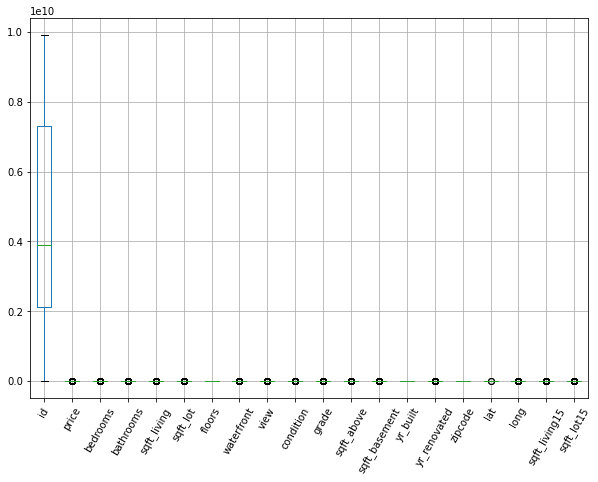

In [8]:
house.boxplot()
plt.xticks(rotation=60)

In [9]:
numerical = []
for i in house.columns:
    if (house[i].dtype == np.float64 or house[i].dtype == np.int64):
        numerical.append(house[i].name)
numerical = numerical[1:]
numerical

['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

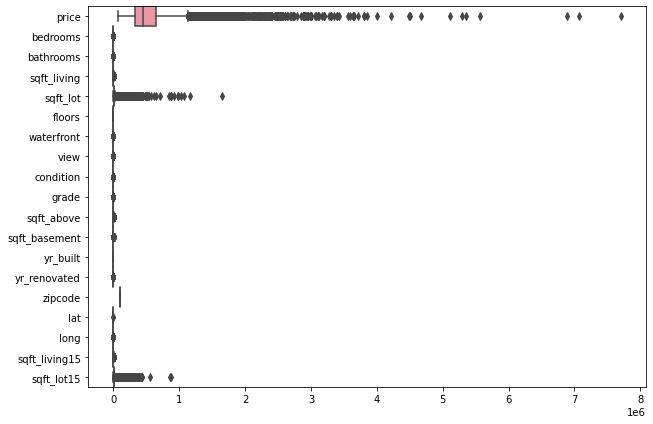

In [10]:
sn.boxplot(data = house[numerical], width=1, orient = 'h')
plt.show()

<AxesSubplot:>

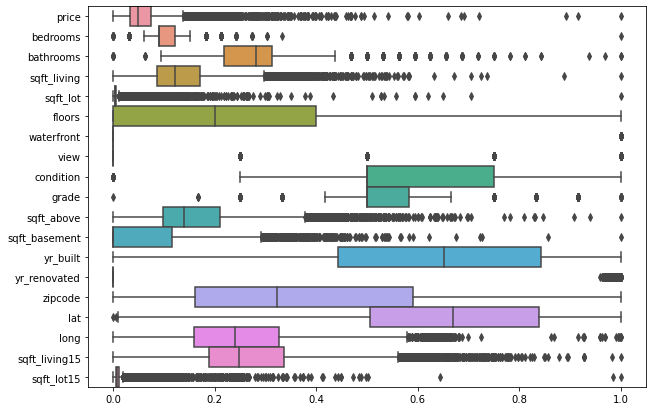

In [11]:
scaler = MinMaxScaler()
house[numerical] = scaler.fit_transform(house[numerical].values.astype(float)) # Нормализация
sn.boxplot(data = house[numerical], width=1, orient = 'h')

## Задание 4
##### Выполните замену категориальных признаков;

In [12]:
categorical = ['id']
for i in house.columns:
    if (house[i].dtype != np.float64 and house[i].dtype != np.int64):
        categorical.append(house[i].name)
categorical

['id', 'date']

In [13]:
encoder = LabelEncoder()
for i in categorical:
    house[i] = encoder.fit_transform(house[i])
house

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,15339,164,0.019266,0.090909,0.12500,0.067170,0.003108,0.0,0.0,0.0,...,0.500000,0.097588,0.000000,0.478261,0.000000,0.893939,0.571498,0.217608,0.161934,0.005742
1,14466,220,0.060721,0.090909,0.28125,0.172075,0.004072,0.4,0.0,0.0,...,0.500000,0.206140,0.082988,0.443478,0.988089,0.626263,0.908959,0.166113,0.222165,0.008027
2,13503,290,0.013770,0.060606,0.12500,0.036226,0.005743,0.0,0.0,0.0,...,0.416667,0.052632,0.000000,0.286957,0.000000,0.136364,0.936143,0.237542,0.399415,0.008513
3,6371,220,0.069377,0.121212,0.37500,0.126038,0.002714,0.0,0.0,0.0,...,0.500000,0.083333,0.188797,0.565217,0.000000,0.681818,0.586939,0.104651,0.165376,0.004996
4,4955,283,0.057049,0.090909,0.25000,0.104906,0.004579,0.0,0.0,0.0,...,0.583333,0.152412,0.000000,0.756522,0.000000,0.368687,0.741354,0.393688,0.241094,0.007871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,574,19,0.037377,0.090909,0.31250,0.093585,0.000370,0.8,0.0,0.0,...,0.583333,0.135965,0.000000,0.947826,0.000000,0.515152,0.874055,0.143688,0.194631,0.000986
21609,14564,288,0.042623,0.121212,0.31250,0.152453,0.003206,0.4,0.0,0.0,...,0.583333,0.221491,0.000000,0.991304,0.000000,0.732323,0.570693,0.130399,0.246257,0.007523
21610,3621,52,0.042898,0.060606,0.09375,0.055094,0.000503,0.4,0.0,0.0,...,0.500000,0.080044,0.000000,0.947826,0.000000,0.722222,0.705324,0.182724,0.106866,0.001558
21611,629,252,0.042623,0.090909,0.31250,0.098868,0.001132,0.4,0.0,0.0,...,0.583333,0.143640,0.000000,0.904348,0.000000,0.131313,0.608975,0.373754,0.173980,0.000731


## Задание 5
##### Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других;

id              -0.016534
date            -0.004649
price            1.000000
bedrooms         0.308350
bathrooms        0.525138
sqft_living      0.702035
sqft_lot         0.089661
floors           0.256794
waterfront       0.266369
view             0.397293
condition        0.036362
grade            0.667434
sqft_above       0.605567
sqft_basement    0.323816
yr_built         0.054012
yr_renovated     0.126434
zipcode         -0.053203
lat              0.307003
long             0.021626
sqft_living15    0.585379
sqft_lot15       0.082447
Name: price, dtype: float64

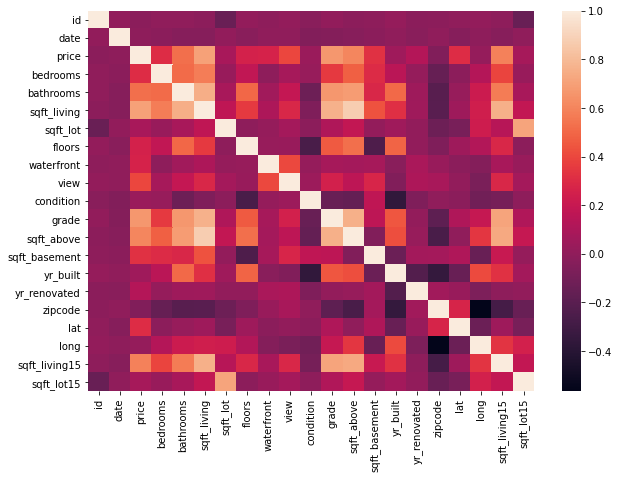

In [14]:
sn.heatmap(house.corr())
house.corr()['price']

In [15]:
for name, val in zip(house.columns, house.corr()['price']):
    print(f"{name:<30}: ", end='')
    print(f'{val:>10.6f}') if abs(val) > 0.25 else print('weak corr!!!')

id                            : weak corr!!!
date                          : weak corr!!!
price                         :   1.000000
bedrooms                      :   0.308350
bathrooms                     :   0.525138
sqft_living                   :   0.702035
sqft_lot                      : weak corr!!!
floors                        :   0.256794
waterfront                    :   0.266369
view                          :   0.397293
condition                     : weak corr!!!
grade                         :   0.667434
sqft_above                    :   0.605567
sqft_basement                 :   0.323816
yr_built                      : weak corr!!!
yr_renovated                  : weak corr!!!
zipcode                       : weak corr!!!
lat                           :   0.307003
long                          : weak corr!!!
sqft_living15                 :   0.585379
sqft_lot15                    : weak corr!!!


In [16]:
cols = []
for name, val in zip(house.columns, house.corr()['price']):
    print(f"{name:<30}: ", end='')
    print(f'{val:>10.6f}') if abs(val) < 0.25 else print('strong corr!!!')
    
    cols.append(name) if abs(val) < 0.25 else ""
cols=cols[2:]
print(cols)

id                            :  -0.016534
date                          :  -0.004649
price                         : strong corr!!!
bedrooms                      : strong corr!!!
bathrooms                     : strong corr!!!
sqft_living                   : strong corr!!!
sqft_lot                      :   0.089661
floors                        : strong corr!!!
waterfront                    : strong corr!!!
view                          : strong corr!!!
condition                     :   0.036362
grade                         : strong corr!!!
sqft_above                    : strong corr!!!
sqft_basement                 : strong corr!!!
yr_built                      :   0.054012
yr_renovated                  :   0.126434
zipcode                       :  -0.053203
lat                           : strong corr!!!
long                          :   0.021626
sqft_living15                 : strong corr!!!
sqft_lot15                    :   0.082447
['sqft_lot', 'condition', 'yr_built', 'yr_renovat

In [17]:
house.drop(cols, axis=1, inplace=True)
house

,id,date,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,lat,sqft_living15
0,15339,164,0.019266,0.090909,0.12500,0.067170,0.0,0.0,0.0,0.500000,0.097588,0.000000,0.571498,0.161934
1,14466,220,0.060721,0.090909,0.28125,0.172075,0.4,0.0,0.0,0.500000,0.206140,0.082988,0.908959,0.222165
2,13503,290,0.013770,0.060606,0.12500,0.036226,0.0,0.0,0.0,0.416667,0.052632,0.000000,0.936143,0.399415
3,6371,220,0.069377,0.121212,0.37500,0.126038,0.0,0.0,0.0,0.500000,0.083333,0.188797,0.586939,0.165376
4,4955,283,0.057049,0.090909,0.25000,0.104906,0.0,0.0,0.0,0.583333,0.152412,0.000000,0.741354,0.241094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,574,19,0.037377,0.090909,0.31250,0.093585,0.8,0.0,0.0,0.583333,0.135965,0.000000,0.874055,0.194631
21609,14564,288,0.042623,0.121212,0.31250,0.152453,0.4,0.0,0.0,0.583333,0.221491,0.000000,0.570693,0.246257
21610,3621,52,0.042898,0.060606,0.09375,0.055094,0.4,0.0,0.0,0.500000,0.080044,0.000000,0.705324,0.106866
21611,629,252,0.042623,0.090909,0.31250,0.098868,0.4,0.0,0.0,0.583333,0.143640,0.000000,0.608975,0.173980


## Задание 6
##### Заполните пропущенные значения в данных;


In [18]:
house.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
floors           0
waterfront       0
view             0
grade            0
sqft_above       0
sqft_basement    0
lat              0
sqft_living15    0
dtype: int64

Пропущенных значений нет

## Задание 7
##### Решите поставленную задачу регрессии в соответствии с заданием. При подборе параметров метода принятия решения (метода регрессии) используйте перекрёстную проверку (изучите возможные для изменения параметры метода регрессии). Вычислите точность решения задачи, вычислив разницу между реальным значением и предсказанным. Вычислите коэффициент корреляции (Пирсона, Спирмена) между реальным значением и предсказанным с учётом p-value.

In [19]:
from  sklearn import linear_model
# линейная регрессия, LASSO регуляризатор.
x, y = house.drop(['price', 'date'], axis=1), house['price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 123)

reg = linear_model.Lasso (alpha = 0.1)
reg.fit (x_train, y_train) # Вычисляем оптимальные значения

Lasso(alpha=0.1)

In [20]:
reg.coef_

array([-1.26138531e-07,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00])

In [21]:
xt = reg.predict(x_test)
print(xt[:10])

[0.06081472 0.06068783 0.05984119 0.06123766 0.0602056  0.06136898
 0.06176846 0.0618816  0.06090352 0.06215734]


In [22]:
print(y_test[:10])

5506     0.060000
9279     0.043934
16034    0.092787
6608     0.120656
20359    0.026754
8798     0.013115
10035    0.080525
13321    0.026230
15842    0.051148
12119    0.056525
Name: price, dtype: float64


In [23]:
print(xt[:10]-y_test[:10])

5506     0.000815
9279     0.016753
16034   -0.032946
6608    -0.059418
20359    0.033452
8798     0.048254
10035   -0.018756
13321    0.035652
15842    0.009756
12119    0.005633
Name: price, dtype: float64


In [24]:
reg.intercept_

0.06222583423075206

In [25]:
# линейная регрессия без использования регуляризаторов;
x, y = house.drop(['price','date' ], axis=1), house['price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 123)

reg = linear_model.LinearRegression()

reg.fit(x_train,y_train)

LinearRegression()

In [26]:
reg.coef_

array([-1.08963613e-07, -1.02642038e-01, -6.55608472e-03,  1.25559247e-01,
       -1.06380304e-02,  8.47949706e-02,  3.48565991e-02,  1.36639216e-01,
        1.42910023e-01,  7.47553146e-02,  5.52860562e-02,  1.52070983e-03])

In [27]:
reg.intercept_

-0.08326686045108075

In [28]:
corr={}
corr['pearson'], _ = stats.pearsonr(xt,y_test) #коэффициент корреляции
corr['spearman'], _ = stats.spearmanr(xt,y_test)
print(corr['pearson'])
print(corr['spearman'])

0.016352244805927854
0.0015439396422982205
